# Análisis Estadístico del Nivel de Satisfacción de Clientes

Este cuaderno realiza un análisis estadístico del nivel de satisfacción de los clientes de un fabricante de bienes de equipo. Se abordan los siguientes puntos:
1. **Simulación de datos**: Datos simulados representando las calificaciones de satisfacción de los clientes.
2. **Cálculo de Intervalos de Confianza**: Evaluación de la media de satisfacción.
3. **Contraste de Hipótesis**: Comprobación de si el nivel de satisfacción promedio supera un valor objetivo.
4. **Visualización**: Gráficos para ayudar en la interpretación de los resultados.

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Parámetros de Entrada
Definimos los parámetros para simular los datos de satisfacción, como la calificación objetivo y el nivel de confianza para los intervalos de confianza.

In [2]:
# Parámetros de entrada
np.random.seed(42)  # Semilla para reproducibilidad
n = 150  # Número de clientes encuestados
satisfaccion_objetivo = 4.0  # Calificación de satisfacción objetivo (en una escala de 1 a 5)
desviacion_real = 0.5  # Desviación estándar de las calificaciones

# Niveles de confianza y significancia
nivel_confianza = 0.95
nivel_significancia = 0.05  # Complemento del nivel de confianza

## Simulación de Datos de Satisfacción
Simulamos las calificaciones de satisfacción de los clientes siguiendo una distribución normal con media alrededor del objetivo y la desviación estándar proporcionada.

In [3]:
# Simulamos las calificaciones de satisfacción
calificaciones_satisfaccion = np.random.normal(loc=satisfaccion_objetivo, scale=desviacion_real, size=n)

## Cálculo del Intervalo de Confianza
Calculamos el intervalo de confianza para la media de satisfacción utilizando la distribución t de Student, para obtener un rango dentro del cual esperamos que se encuentre la media real del nivel de satisfacción.

In [4]:
# Cálculo del intervalo de confianza
media_muestral = np.mean(calificaciones_satisfaccion)
error_estandar = stats.sem(calificaciones_satisfaccion)

intervalo = stats.t.interval(
    confidence=nivel_confianza,  # Nivel de confianza
    df=n-1,  # Grados de libertad
    loc=media_muestral,  # Media muestral
    scale=error_estandar  # Error estándar
)

print("Intervalo de confianza al 95% para la calificación de satisfacción promedio:", intervalo)

Intervalo de confianza al 95% para la calificación de satisfacción promedio: (np.float64(3.8828174422086046), np.float64(4.034855690638856))


## Contraste de Hipótesis
Realizamos un contraste de hipótesis para verificar si el nivel de satisfacción promedio es significativamente mayor que el nivel objetivo de 4.0.
- **Hipótesis nula (H0)**: El nivel de satisfacción promedio es igual a 4.0.
- **Hipótesis alternativa (H1)**: El nivel de satisfacción promedio es mayor a 4.0.

Realizamos un test *t* de una muestra y comparamos el p-valor con el nivel de significancia para tomar una decisión sobre H0.

In [5]:
# Realizamos el contraste de hipótesis
estadistico, p_valor = stats.ttest_1samp(calificaciones_satisfaccion, popmean=satisfaccion_objetivo)

print("\nResultados del contraste de hipótesis:")
print(f"Estadístico t: {estadistico:.2f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor < nivel_significancia:
    print("Rechazamos H0: El nivel de satisfacción promedio es significativamente mayor a 4.0.")
else:
    print("No rechazamos H0: No hay evidencia suficiente para afirmar que el nivel de satisfacción es mayor a 4.0.")


Resultados del contraste de hipótesis:
Estadístico t: -1.07
P-valor: 0.2864
No rechazamos H0: No hay evidencia suficiente para afirmar que el nivel de satisfacción es mayor a 4.0.


## Visualización de Resultados
Para una mejor comprensión de los resultados, visualizamos las calificaciones de satisfacción en un histograma y mostramos el intervalo de confianza y la media muestral.

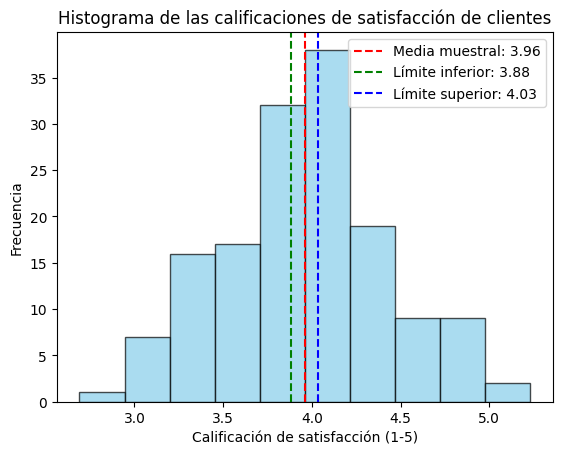

In [6]:
# Histograma de las calificaciones de satisfacción
plt.hist(calificaciones_satisfaccion, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(media_muestral, color='red', linestyle='--', label=f'Media muestral: {media_muestral:.2f}')
plt.axvline(intervalo[0], color='green', linestyle='--', label=f'Límite inferior: {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'Límite superior: {intervalo[1]:.2f}')
plt.title("Histograma de las calificaciones de satisfacción de clientes")
plt.xlabel("Calificación de satisfacción (1-5)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Análisis Final y Conclusión
### Análisis
- **Intervalo de confianza**: Si la calificación objetivo de 4.0 se encuentra dentro del intervalo de confianza, no hay evidencia suficiente para afirmar que el nivel de satisfacción sea significativamente mayor.
- **Contraste de hipótesis**: Si el p-valor es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula, indicando que el nivel de satisfacción es mayor al objetivo.

### Conclusión
- **Rechazo de H0**: Si rechazamos H0, concluimos que el nivel de satisfacción de los clientes es significativamente mayor que el objetivo de 4.0, lo que sugiere una alta satisfacción de los clientes.
- **No rechazo de H0**: Si no rechazamos H0, no tenemos evidencia suficiente para afirmar que el nivel de satisfacción es mayor a 4.0, lo que podría sugerir la necesidad de mejorar la calidad del servicio o los productos.